# Comparison of the regressions between sea level height and wind data

The results of regressions with both observational and cmip6 data and the three different wind models (NearestPoint, Timmerman and Dangendorf) are performed



In this notebook, functions are used from: 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import figures as figs
from code import functions as func


# Declare global variables
window = 20 # Smoothing window for lowpass filter

#### Load observational results and obtain detrended and smoothed timeseries

In [2]:
# Import tide gauge data file
tg_data = imprt.import_obs_slh_data()

In [3]:
# Import regression results

results_np_era5, results_tim_era5, results_dang_era5 = imprt.import_reg_results('results', 'era5')
timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

results_np_20cr, results_tim_20cr, results_dang_20cr = imprt.import_reg_results('results', '20cr')
timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

In [4]:
# Obtain smoothed timeseries

tg_data_lws = func.obs_lws_smoothed_df(tg_data, 20, 'tg')

ts_lws_np_era5 = func.obs_lws_smoothed_df(timeseries_np_era5, 20, 'reg')
ts_lws_tim_era5 = func.obs_lws_smoothed_df(timeseries_tim_era5, 20, 'reg')
ts_lws_dang_era5 = func.obs_lws_smoothed_df(timeseries_dang_era5, 20, 'reg')

ts_lws_np_20cr = func.obs_lws_smoothed_df(timeseries_np_20cr, 20, 'reg')
ts_lws_tim_20cr = func.obs_lws_smoothed_df(timeseries_tim_20cr, 20, 'reg')
ts_lws_dang_20cr = func.obs_lws_smoothed_df(timeseries_dang_20cr, 20, 'reg')

#### Load cmip6 regression results and obtain detrended and smoothed timeseries

In [5]:
# Open zos data file
zos = imprt.import_cmip6_slh_data()

In [6]:
# Import regression results
results_np_hist, results_tim_hist, results_dang_hist = imprt.import_reg_results('results', 'historical')
timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist = imprt.import_reg_results('timeseries', 'historical')

In [7]:
# Obtain smoothed timeseries
zos_lws = func.wc_cmip6_lws_smoothed_ds(zos.zos, 20)
ts_lws_np_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_np_hist.wind_total, 20)
ts_lws_tim_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_tim_hist.wind_total, 20)
ts_lws_dang_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_dang_hist.wind_total, 20)

#### Compare timeseries of wind contribution

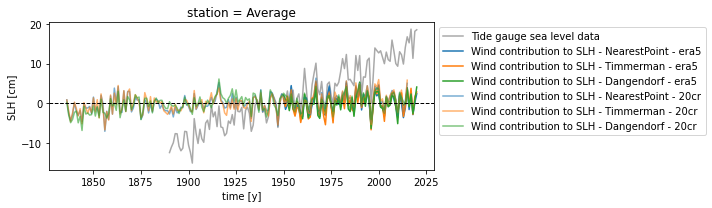

In [8]:
timeseries = [timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5, timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr]
labels = ['Tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data, timeseries, labels)

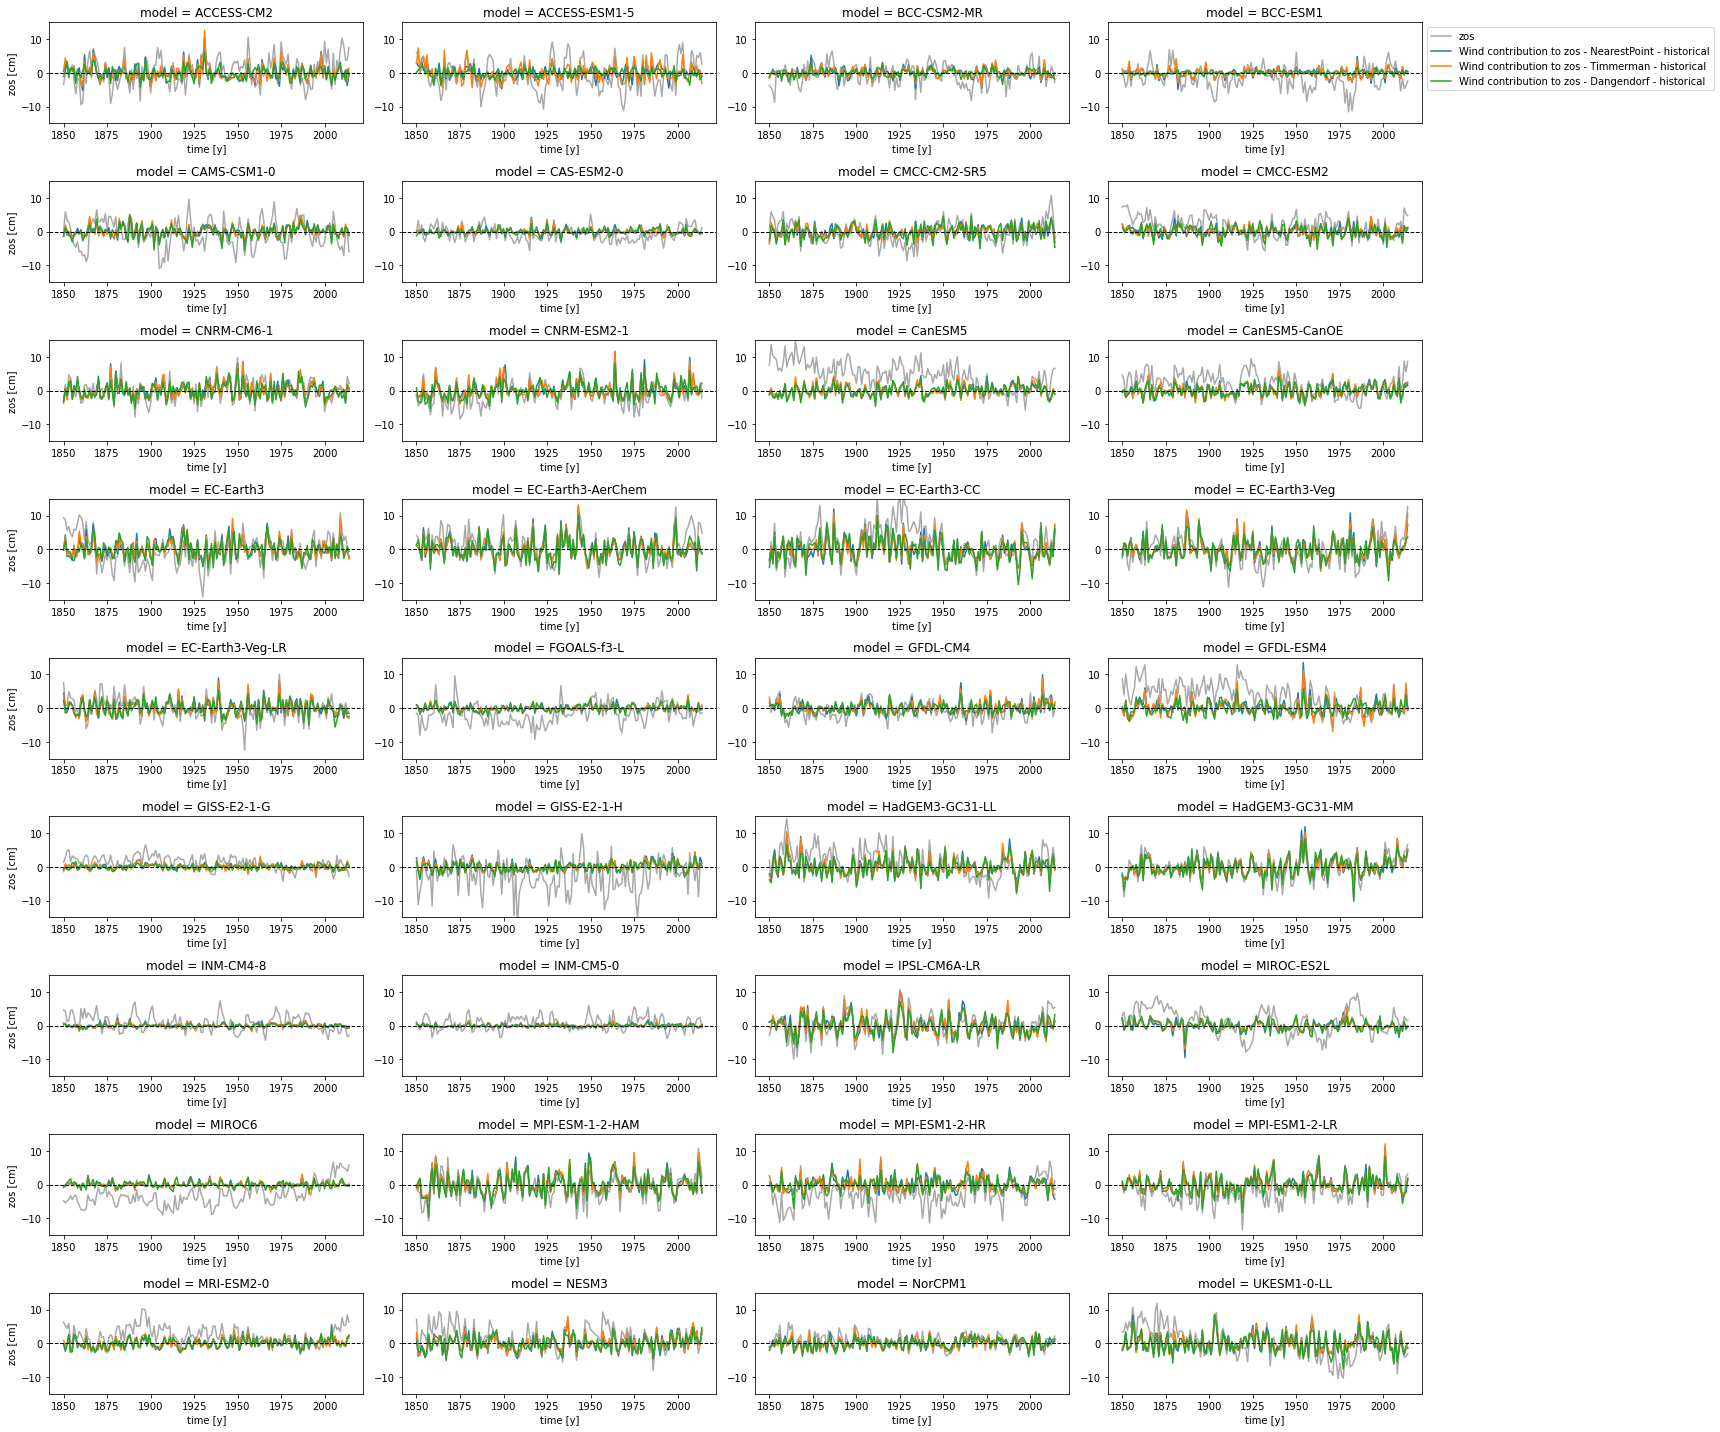

In [9]:
timeseries = [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos.zos, timeseries, labels, station = 'Average', show_zos = True)

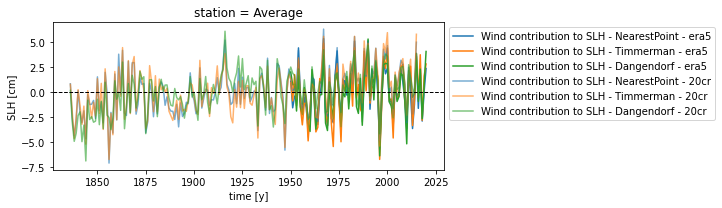

In [10]:
timeseries = [timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5, timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr]
labels = ['Tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data, timeseries, labels, show_tg=False)

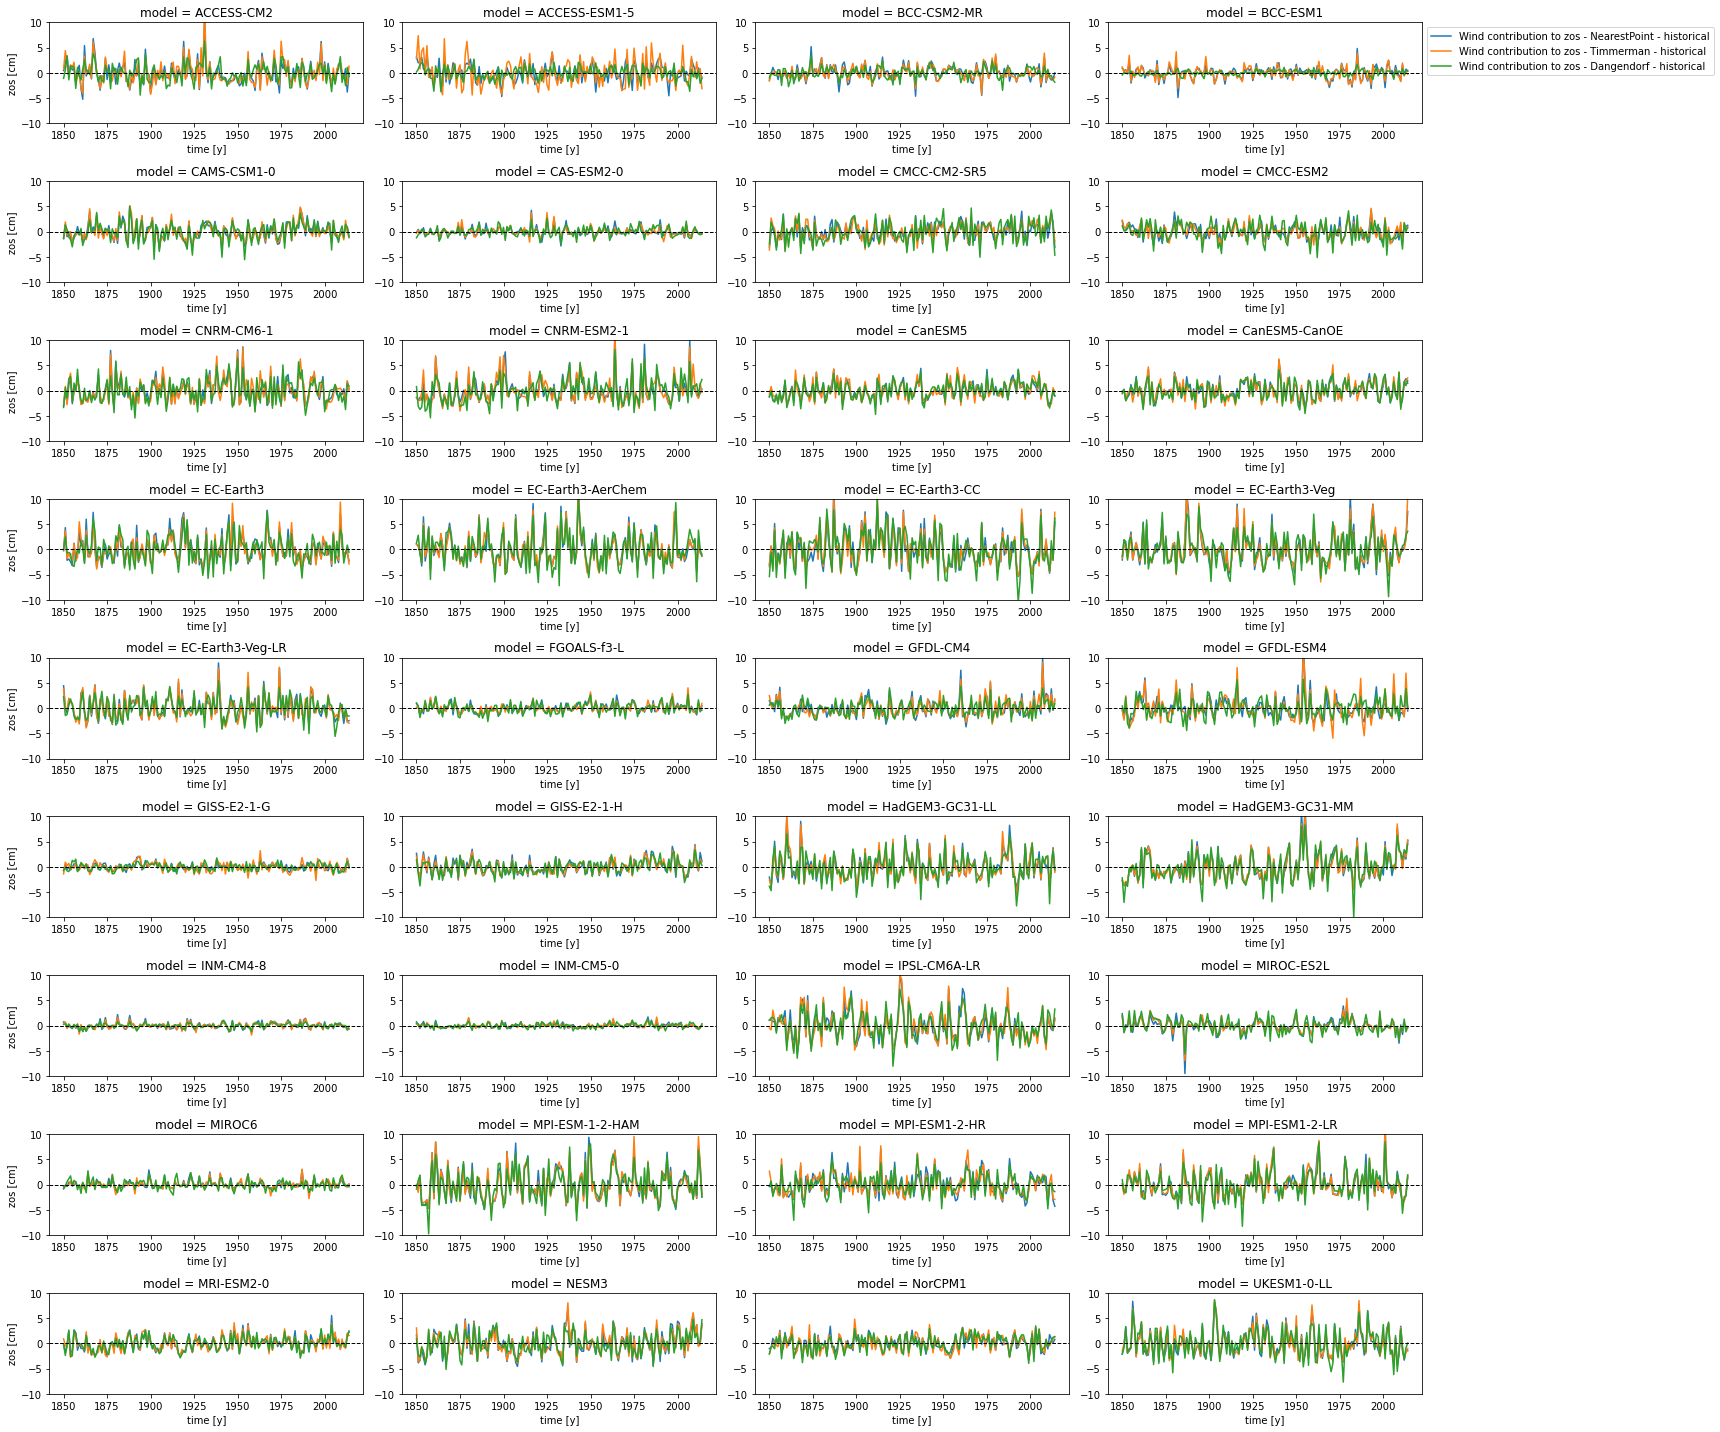

In [11]:
timeseries = [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos.zos, 
                                  [timeseries_np_hist.wind_total, timeseries_tim_hist.wind_total, timeseries_dang_hist.wind_total], 
                                  labels, station = 'Average', show_zos = False)

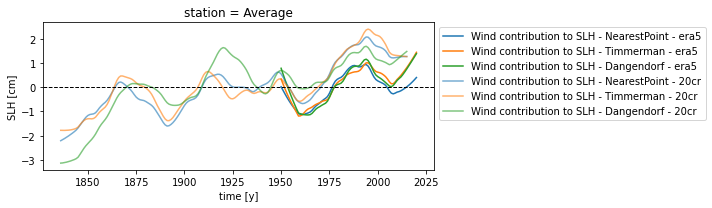

In [12]:
timeseries = [ts_lws_np_era5, ts_lws_tim_era5, ts_lws_dang_era5, ts_lws_np_20cr, ts_lws_tim_20cr, ts_lws_dang_20cr]
labels = ['Smoothed tide gauge sea level data', 'Wind contribution to SLH - NearestPoint - era5',
         'Wind contribution to SLH - Timmerman - era5', 'Wind contribution to SLH - Dangendorf - era5', 
          'Wind contribution to SLH - NearestPoint - 20cr', 'Wind contribution to SLH - Timmerman - 20cr', 
          'Wind contribution to SLH - Dangendorf - 20cr']

figs.plot_obs_tg_wc_one_station(tg_data_lws, timeseries, labels, show_tg=False, smoothed = True)

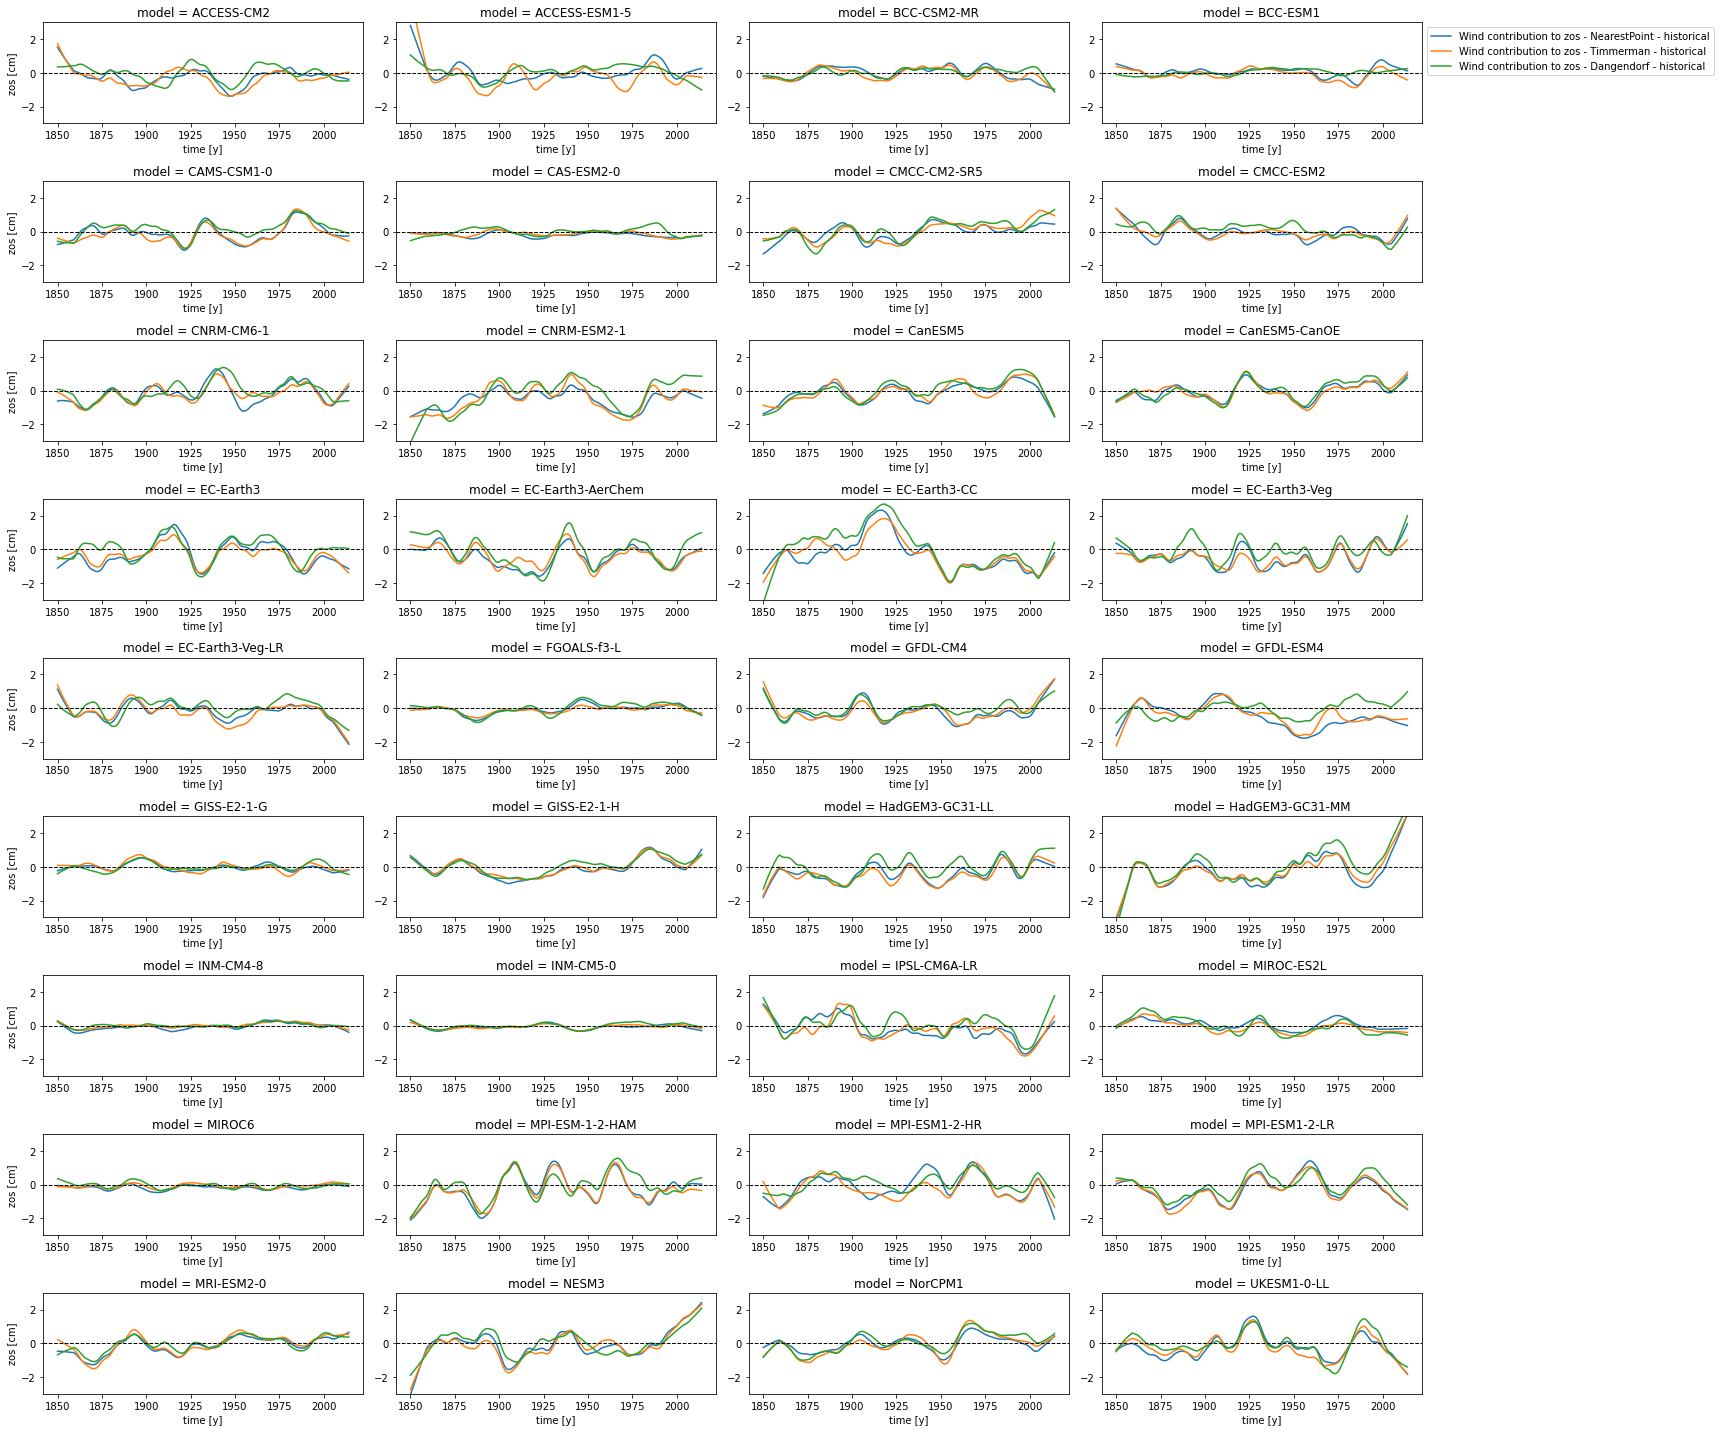

In [13]:
timeseries = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
labels = ['zos', 'Wind contribution to zos - NearestPoint - historical', 'Wind contribution to zos - Timmerman - historical', 'Wind contribution to zos - Dangendorf - historical']

figs.plot_zos_wc_per_model_one_station(zos_lws, 
                                  [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist], 
                                  labels, station = 'Average', show_zos = False, smoothed = True)

#### Compare trends of wind contribution

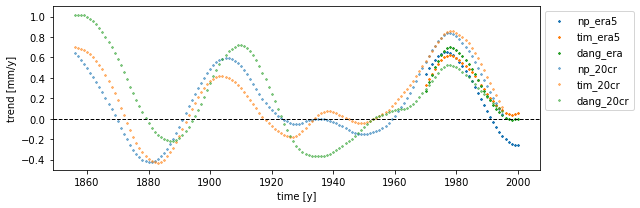

In [14]:
timeseries = [ts_lws_np_era5, ts_lws_tim_era5, ts_lws_dang_era5, ts_lws_np_20cr, ts_lws_tim_20cr, ts_lws_dang_20cr]
labels = ['np_era5', 'tim_era5', 'dang_era', 'np_20cr', 'tim_20cr', 'dang_20cr']



figs.plot_obs_running_trend(timeseries, labels, period_length = 40)

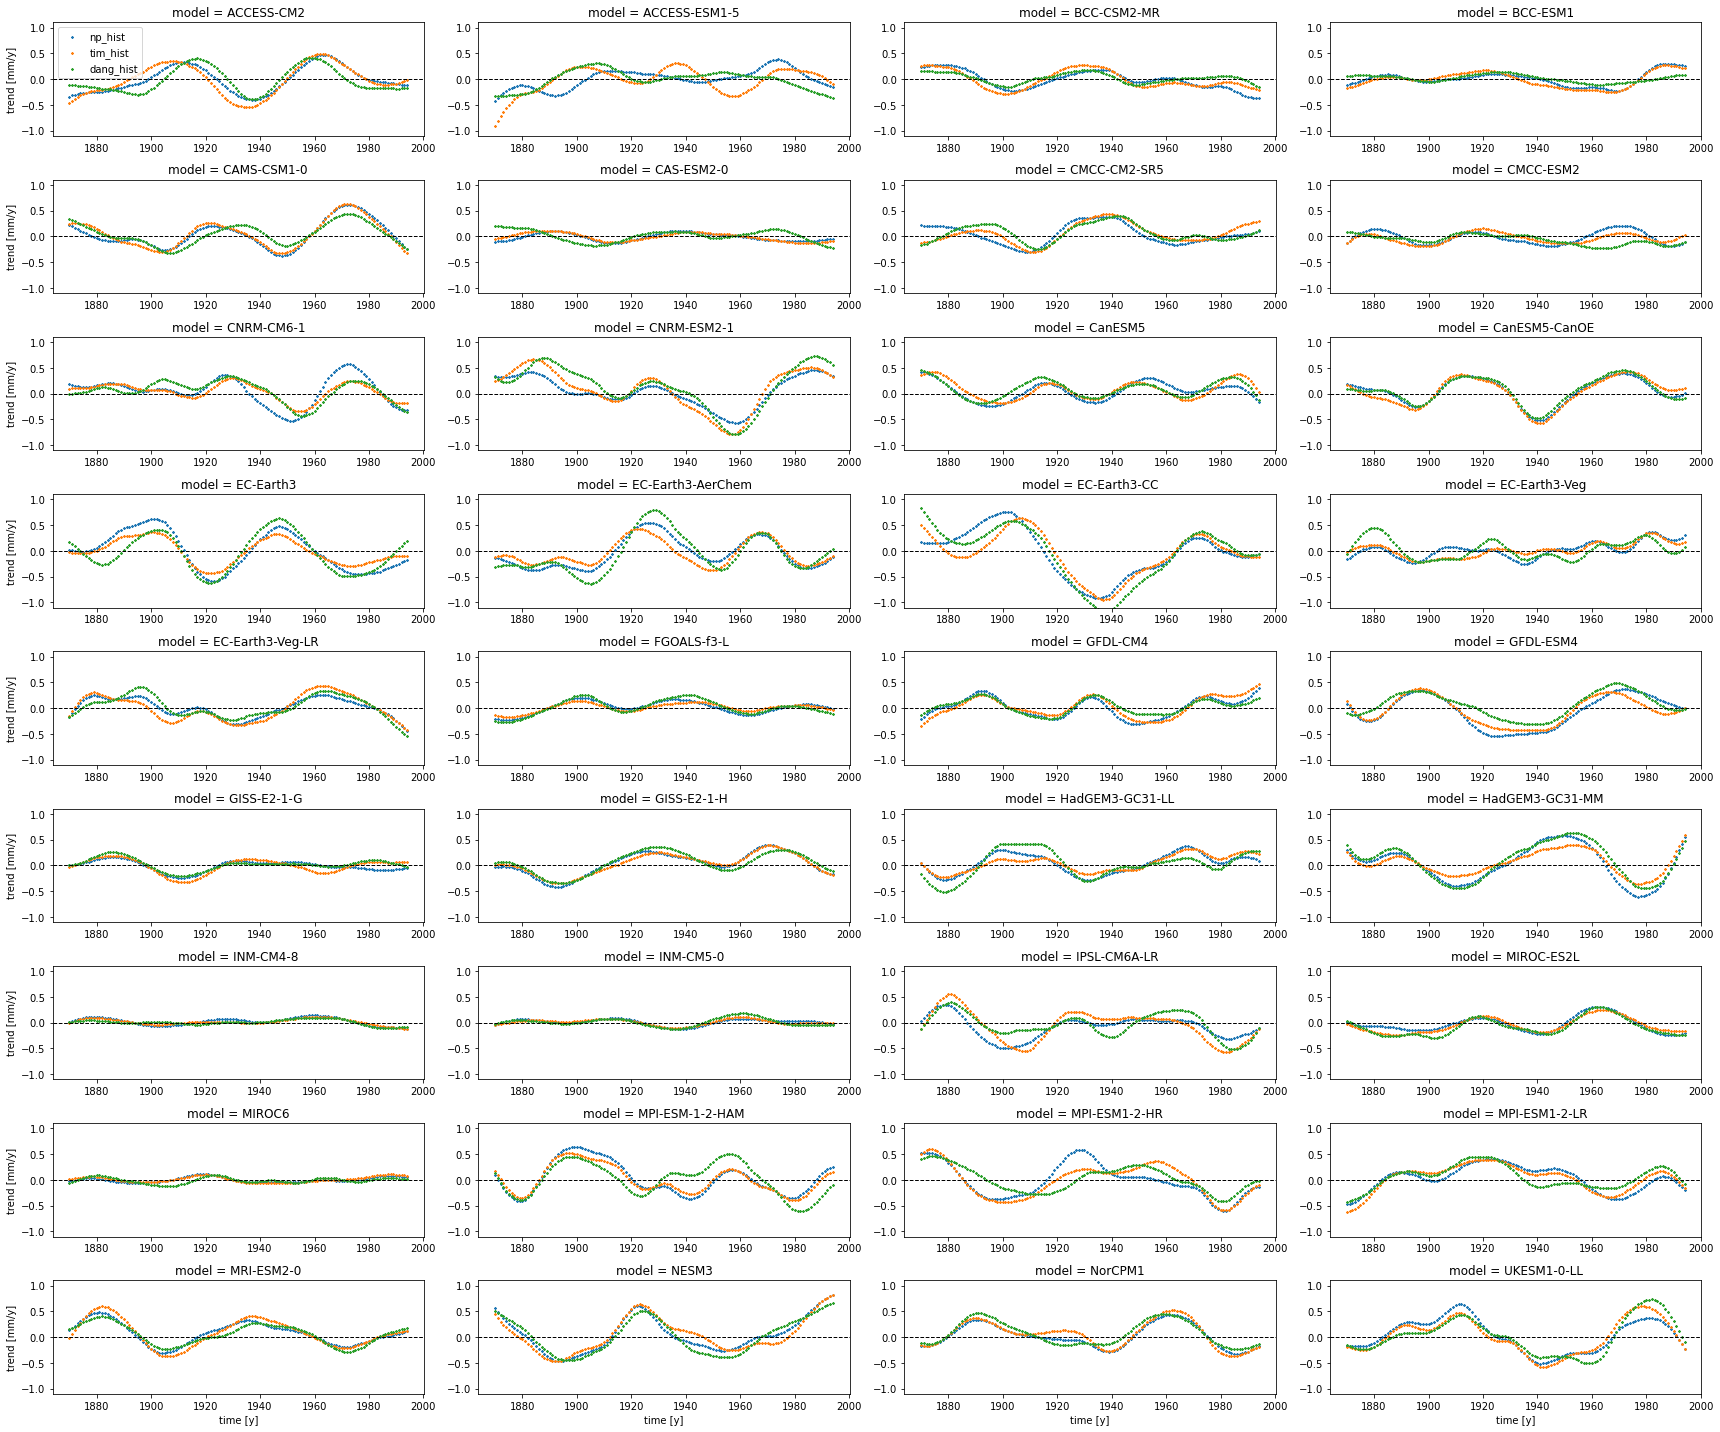

In [15]:
timeseries = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
labels = ['np_hist', 'tim_hist', 'dang_hist']

figs.plot_cmip6_running_trend(timeseries, labels, period_length = 40)

#### Compare regression coefficients

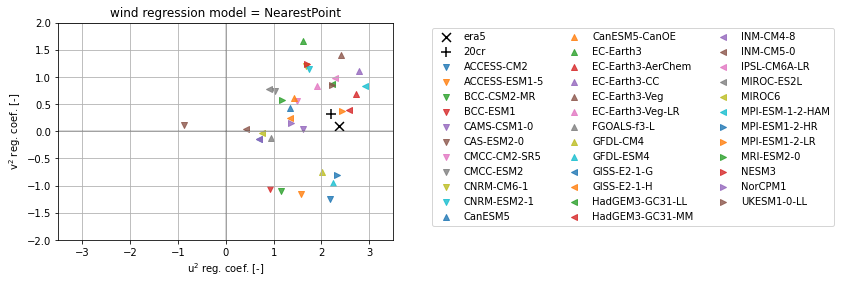

In [16]:
figs.plot_comp_reg_results_one_station(results_np_era5, results_np_20cr, results_np_hist, 'Average', 'NearestPoint')

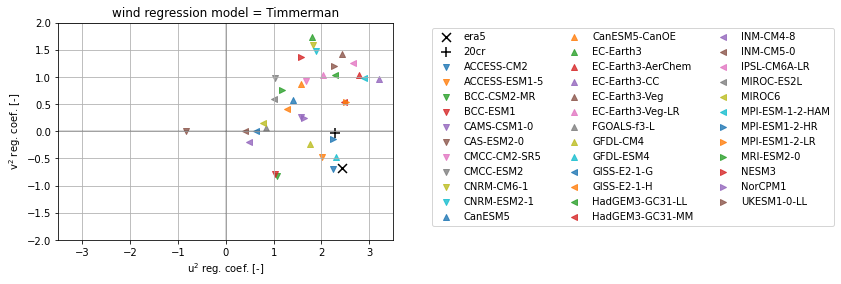

In [17]:
figs.plot_comp_reg_results_one_station(results_tim_era5, results_tim_20cr, results_tim_hist, 'Average', 'Timmerman')

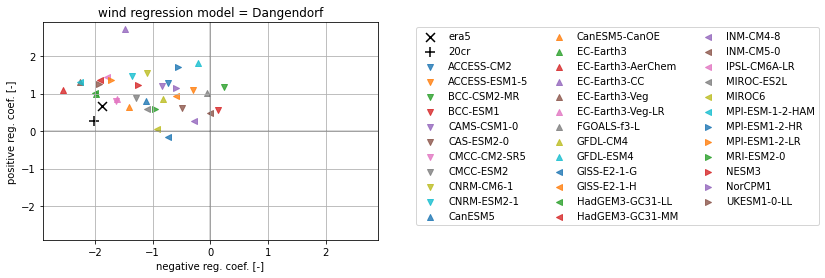

In [18]:
figs.plot_comp_reg_results_one_station(results_dang_era5, results_dang_20cr, results_dang_hist, 'Average', 'Dangendorf')

### Compare sine fit results between observational and cmip6 results

The wind contribution to sea level height shows sinusoidal behaviour. We'll fit a sine function to be able to compare the amplitude and frequency of this fit. The phase is not so interesting as the cmip6 data could be easily shifted but our main interest is the behaviour of the wind contribution.


The wind contribution to sea level height is first detrended and than a lowess filter is applied. 

In [19]:
# Obtain detrended and smoothed observational timeseries
ts_dt_lws_np_era5 = func.obs_lws_smoothed_df(timeseries_np_era5, 20, 'reg', detrend_data = True)
ts_dt_lws_tim_era5 = func.obs_lws_smoothed_df(timeseries_tim_era5, 20, 'reg', detrend_data = True)
ts_dt_lws_dang_era5 = func.obs_lws_smoothed_df(timeseries_dang_era5, 20, 'reg', detrend_data = True)

ts_dt_lws_np_20cr = func.obs_lws_smoothed_df(timeseries_np_20cr, 20, 'reg', detrend_data = True)
ts_dt_lws_tim_20cr = func.obs_lws_smoothed_df(timeseries_tim_20cr, 20, 'reg', detrend_data = True)
ts_dt_lws_dang_20cr = func.obs_lws_smoothed_df(timeseries_dang_20cr, 20, 'reg', detrend_data = True)

In [20]:
# Obtain detrended and smoothed model timeseries
ts_lws_np_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_np_hist.wind_total, 20, detrend_data = True)
ts_lws_tim_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_tim_hist.wind_total, 20, detrend_data = True)
ts_lws_dang_hist = func.wc_cmip6_lws_smoothed_ds(timeseries_dang_hist.wind_total, 20, detrend_data = True)

In [21]:
data_lst = [ts_dt_lws_np_era5, ts_dt_lws_tim_era5, ts_dt_lws_dang_era5,
           ts_dt_lws_np_20cr, ts_dt_lws_tim_20cr, ts_dt_lws_dang_20cr]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

obs_fits_df_40 = func.obtain_obs_sine_fits(data_lst, label_lst, 40)
obs_fits_df_60 = func.obtain_obs_sine_fits(data_lst, label_lst, 60)

In [22]:
obs_fits_df_40

np_era5              tim_era5             dang_era5             \
                value   variance      value   variance      value   variance   
parameter                                                                      
y_distance   0.107865   0.000449   0.212544   0.000824   0.215445   0.001138   
amplitude   -0.753977   0.000890  -0.549573   0.001624  -0.725775   0.002194   
frequency    0.130785   0.000003   0.148360   0.000010   0.153858   0.000008   
phase       52.598660  13.667550  17.703427  40.474772   6.772415  32.800653   
wavelength  48.042125        NaN  42.350851        NaN  40.837675        NaN   

              np_20cr              tim_20cr             dang_20cr             
                value   variance      value   variance      value   variance  
parameter                                                                     
y_distance   0.020513   0.001311   0.093424   0.001516   0.043537   0.002792  
amplitude   -0.479351   0.002581  -0.538900   0.003016  -0.398760   0.005715  
frequency    0.152886   0.000004   0.152398   0.000004   0.149571   0.000012  
phase        8.250309  16.078753   8.920017  14.177191  13.915501  44.143109  
wavelength  41.097314        NaN  41.228729        NaN  42.008073        NaN

In [23]:
obs_fits_df_60

np_era5              tim_era5             dang_era5             \
                value   variance      value   variance      value   variance   
parameter                                                                      
y_distance   0.107864   0.000449   0.212543   0.000824   0.215449   0.001138   
amplitude    0.753975   0.000890   0.549572   0.001624   0.725776   0.002194   
frequency    0.130784   0.000003   0.148361   0.000010   0.153857   0.000008   
phase      -51.072494  13.668201 -85.969557  40.473827 -96.898708  32.802050   
wavelength  48.042387        NaN  42.350791        NaN  40.837865        NaN   

              np_20cr                 tim_20cr            dang_20cr             
                value      variance      value  variance      value   variance  
parameter                                                                       
y_distance  -0.050126  7.210306e-04   0.044261  0.001400   0.067824   0.001906  
amplitude    0.689101  1.437807e-03   0.603813  0.002731   0.689540   0.003534  
frequency    0.098081  9.851613e-07   0.100236  0.000003   0.110262   0.000003  
phase       13.540754  3.660066e+00   9.224878  9.869126  -9.993800  12.340378  
wavelength  64.061163           NaN  62.683995       NaN  56.984245        NaN

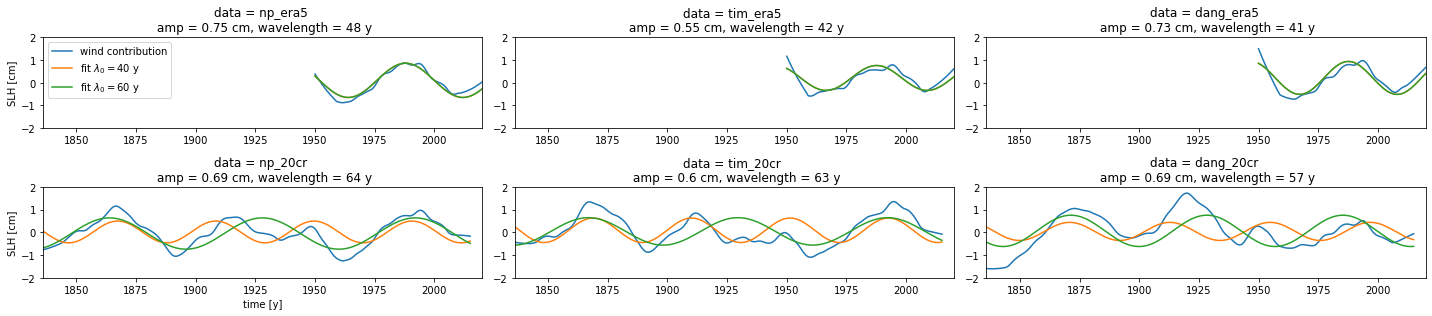

In [24]:
figs.plot_obs_sine_fits(data_lst, [obs_fits_df_40, obs_fits_df_60], label_lst, 
                        ['wind contribution', 'fit $\lambda_0=40$ y', 'fit $\lambda_0=60$ y'])

The outcomes of the wavelength are very much depending on initial values so I will perform the fitting with a whole range of initial values and check variances of results.

In [25]:
sine_fits_np_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_np_era5)
sine_fits_np_era5

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.107865   0.000449   0.107865   0.000449   0.107864   0.000449   
amplitude     0.753977   0.000890  -0.753977   0.000890  -0.753975   0.000890   
frequency     0.130785   0.000003   0.130785   0.000003   0.130784   0.000003   
phase       156.270872  13.667394  52.598660  13.667550 -10.231635  13.668239   
wavelength   48.042060        NaN  48.042125        NaN  48.042415        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance   0.107864   0.000449   0.107864   0.000449  
amplitude    0.753975   0.000890   0.753975   0.000890  
frequency    0.130784   0.000003   0.130784   0.000003  
phase      -51.072494  13.668201 -82.488611  13.668103  
wavelength  48.042387        NaN  48.042351        NaN

In [26]:
sine_fits_tim_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_tim_era5)
sine_fits_tim_era5

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.212542   0.000824   0.212544   0.000824   0.212542   0.000824   
amplitude     0.549572   0.001624  -0.549573   0.001624  -0.549572   0.001624   
frequency     0.148361   0.000010   0.148360   0.000010   0.148361   0.000010   
phase       121.374547  40.473592  17.703427  40.474772 -45.129369  40.473818   
wavelength   42.350646        NaN  42.350851        NaN  42.350717        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance   0.212543   0.000824   0.212540   0.000824  
amplitude    0.549572   0.001624   0.549572   0.001624  
frequency    0.148361   0.000010   0.148361   0.000010  
phase      -85.969557  40.473827 -92.254449  40.473033  
wavelength  42.350791        NaN  42.350547        NaN

In [27]:
sine_fits_dang_era5 = func.obtain_sine_fits_wavelengths(ts_dt_lws_dang_era5)
sine_fits_dang_era5

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.215448   0.001138   0.215445   0.001138   0.215448   0.001138   
amplitude     0.725776   0.002194  -0.725775   0.002194  -0.725776   0.002194   
frequency     0.153857   0.000008   0.153858   0.000008   0.153857   0.000008   
phase       110.446073  32.801739   6.772415  32.800653 -56.058489  32.801748   
wavelength   40.837820        NaN  40.837675        NaN  40.837800        NaN   

                   60                     70             
                value   variance       value   variance  
parameter                                                
y_distance   0.215449   0.001138    0.215446   0.001138  
amplitude    0.725776   0.002194    0.725775   0.002194  
frequency    0.153857   0.000008    0.153857   0.000008  
phase      -96.898708  32.802050 -122.032506  32.801020  
wavelength  40.837865        NaN   40.837725        NaN

In [28]:
sine_fits_np_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_np_20cr)
sine_fits_np_20cr

30                    40                    50             \
                 value   variance      value   variance      value   variance   
parameter                                                                       
y_distance    0.020513   0.001311   0.020513   0.001311   0.020513   0.001311   
amplitude    -0.479352   0.002581  -0.479351   0.002581   0.479352   0.002581   
frequency     0.152886   0.000004   0.152886   0.000004   0.152886   0.000004   
phase       108.780263  16.079513   8.250309  16.078753 -51.440630  16.079259   
wavelength   41.097175        NaN  41.097314        NaN  41.097220        NaN   

                   60                       70                
                value      variance      value      variance  
parameter                                                     
y_distance  -0.050126  7.210306e-04  -0.050126  7.210321e-04  
amplitude    0.689101  1.437807e-03   0.689101  1.437802e-03  
frequency    0.098081  9.851613e-07   0.098081  9.851818e-07  
phase       13.540754  3.660066e+00 -17.874898  3.660143e+00  
wavelength  64.061163           NaN  64.061256           NaN

In [29]:
sine_fits_tim_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_tim_20cr)
sine_fits_tim_20cr

30                     40                    50             \
                value    variance      value   variance      value   variance   
parameter                                                                       
y_distance   0.066514    0.002321   0.093424   0.001516   0.093424   0.001516   
amplitude   -0.106942    0.004643  -0.538900   0.003016   0.538900   0.003016   
frequency    0.205339    0.000145   0.152398   0.000004   0.152397   0.000004   
phase        8.710831  537.784858   8.920017  14.177191 -50.768341  14.176716   
wavelength  30.599043         NaN  41.228729        NaN  41.228992        NaN   

                   60                   70            
                value  variance      value  variance  
parameter                                             
y_distance   0.044261  0.001400   0.044262  0.001400  
amplitude    0.603813  0.002731   0.603812  0.002731  
frequency    0.100236  0.000003   0.100236  0.000003  
phase        9.224878  9.869126 -22.191237  9.869073  
wavelength  62.683995       NaN  62.683934       NaN

In [30]:
sine_fits_dang_20cr = func.obtain_sine_fits_wavelengths(ts_dt_lws_dang_20cr)
sine_fits_dang_20cr

30                    40                    50             \
                value   variance      value   variance      value   variance   
parameter                                                                      
y_distance   0.051041   0.002938   0.043537   0.002792   0.067834   0.001905   
amplitude    0.322288   0.005890  -0.398760   0.005715   0.689537   0.003534   
frequency    0.194654   0.000021   0.149571   0.000012   0.110264   0.000003   
phase       29.483775  76.317086  13.915501  44.143109  27.701905  12.340955   
wavelength  32.278678        NaN  42.008073        NaN  56.983313        NaN   

                   60                    70             
                value   variance      value   variance  
parameter                                               
y_distance   0.067824   0.001906   0.067821   0.001906  
amplitude    0.689540   0.003534  -0.689541   0.003534  
frequency    0.110262   0.000003   0.110261   0.000003  
phase       -9.993800  12.340378 -31.983704  12.340075  
wavelength  56.984245        NaN  56.984587        NaN

Best wavelength results of fitting different wavelengths and checking occurence and variance

np_era5 = 48

tim_era5 = 40

dang_era5 = 41




np_20cr = 41 vs 64

tim_20cr = 41 vs 62

dang_20cr = 33 vs 42 vs 57

### Fit sine functions for model data

I will fit the models using either wavelength 40 or 60

In [31]:
data_lst = [ts_lws_np_hist, ts_lws_tim_hist, ts_lws_dang_hist]
label_lst = ['NearestPoint', 'Timmerman', 'Dangendorf']

cmip6_fits_df_40, cmip6_perf_df_40 = func.obtain_cmip6_sine_fits(data_lst, label_lst, 40)
cmip6_fits_df_60, cmip6_perf_df_60 = func.obtain_cmip6_sine_fits(data_lst, label_lst, 60)

In [32]:
cmip6_fits_df_40

NearestPoint                                                   \
             ACCESS-CM2            ACCESS-ESM1-5             BCC-CSM2-MR   
                  value   variance         value    variance       value   
parameter                                                                  
y_distance    -0.050042   0.001290      0.118871    0.001940    0.099795   
amplitude      0.259772   0.002504      0.222182    0.003826    0.278041   
frequency      0.158052   0.000017      0.139321    0.000035    0.133724   
phase         -1.602398  65.234552     33.173432  128.919956   44.290882   
wavelength    39.753805        NaN     45.098743         NaN   46.986142   

                                                                    ...  \
                        BCC-ESM1            CAMS-CSM1-0             ...   
             variance      value   variance       value   variance  ...   
parameter                                                           ...   
y_distance   0.000602   0.038473   0.000408   -0.211772   0.000950  ...   
amplitude    0.001203   0.186896   0.000812   -0.488846   0.001773  ...   
frequency    0.000007   0.170419   0.000010    0.115355   0.000004  ...   
phase       25.005850 -25.332704  38.343966  102.107380  13.791921  ...   
wavelength        NaN  36.869025        NaN   54.468069        NaN  ...   

              Dangendorf                                             \
           MPI-ESM1-2-LR           MRI-ESM2-0                 NESM3   
                   value  variance      value   variance      value   
parameter                                                             
y_distance     -0.489492  0.001182  -0.490419   0.000592  -0.404453   
amplitude       0.650361  0.002336   0.235377   0.001175   0.210236   
frequency       0.190147  0.000002   0.167231   0.000009   0.144133   
phase         -69.692198  9.205975 -19.192123  35.265132  25.570580   
wavelength     33.043844       NaN  37.571835        NaN  43.593052   

                                                                     
                          NorCPM1            UKESM1-0-LL             
              variance      value   variance       value   variance  
parameter                                                            
y_distance    0.002922  -0.506813   0.000952    0.160105   0.002655  
amplitude     0.005721   0.228162   0.001943   -0.421254   0.005231  
frequency     0.000059   0.177387   0.000015    0.147563   0.000013  
phase       220.805655 -39.763296  55.288236   18.700010  47.974644  
wavelength         NaN  35.420860        NaN   42.579717        NaN  

[5 rows x 216 columns]

In [33]:
cmip6_fits_df_60

NearestPoint                                                  \
             ACCESS-CM2            ACCESS-ESM1-5            BCC-CSM2-MR   
                  value   variance         value   variance       value   
parameter                                                                 
y_distance    -0.070957   0.000879      0.076120   0.001793    0.110867   
amplitude      0.450234   0.001720      0.325294   0.003528   -0.337178   
frequency      0.095335   0.000004      0.093885   0.000015    0.085768   
phase         19.496956  14.259072     21.974255  55.049789   37.169618   
wavelength    65.906654        NaN     66.924228        NaN   73.258098   

                                                                    ...  \
                        BCC-ESM1            CAMS-CSM1-0             ...   
             variance      value   variance       value   variance  ...   
parameter                                                           ...   
y_distance   0.000495   0.050931   0.000410   -0.211777   0.000950  ...   
amplitude    0.000884   0.234800   0.000712    0.488848   0.001773  ...   
frequency    0.000005   0.075268   0.000007    0.115354   0.000004  ...   
phase       17.280085  57.221418  25.060016  -20.412324  13.791793  ...   
wavelength        NaN  83.477161        NaN   54.468654        NaN  ...   

              Dangendorf                                                       \
           MPI-ESM1-2-LR            MRI-ESM2-0                NESM3             
                   value   variance      value  variance      value  variance   
parameter                                                                       
y_distance     -0.524002   0.002163  -0.451351  0.000321  -0.458701  0.001225   
amplitude       0.358047   0.004277  -0.387074  0.000635   0.762723  0.002362   
frequency       0.095981   0.000014   0.104302  0.000002   0.098780  0.000002   
phase          17.877554  54.130971   1.723395  6.532355  10.773232  7.148540   
wavelength     65.463075        NaN  60.240484       NaN  63.607963       NaN   

                                                        
              NorCPM1           UKESM1-0-LL             
                value  variance       value   variance  
parameter                                               
y_distance  -0.464575  0.000495    0.100123   0.002073  
amplitude   -0.444668  0.000957    0.611771   0.004158  
frequency    0.098183  0.000002    0.095843   0.000005  
phase       11.943660  8.407335   17.880912  17.412019  
wavelength  63.994367       NaN   65.557399        NaN  

[5 rows x 216 columns]

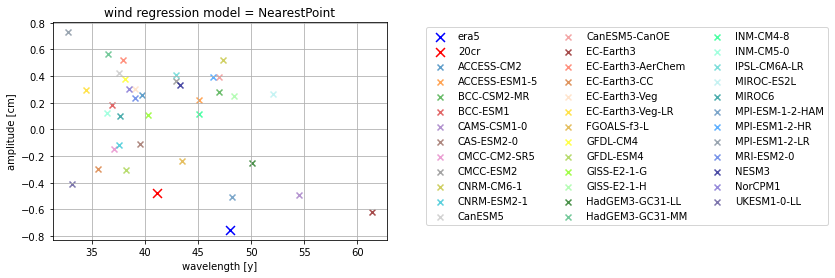

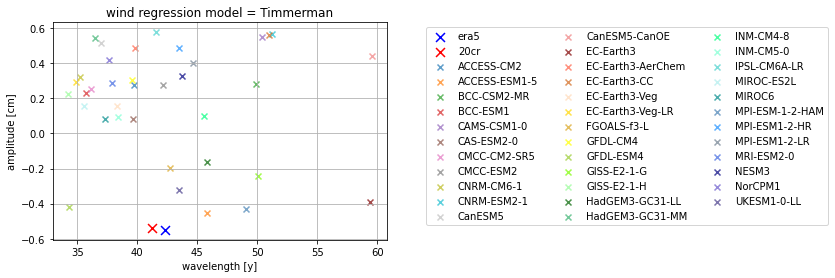

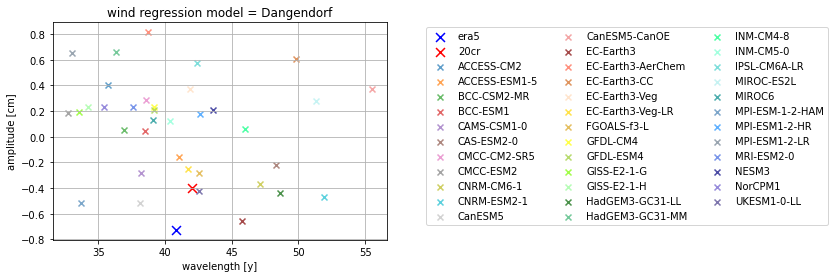

In [34]:
figs.plot_comp_cmip6_fit_results(obs_fits_df_40, cmip6_fits_df_40)

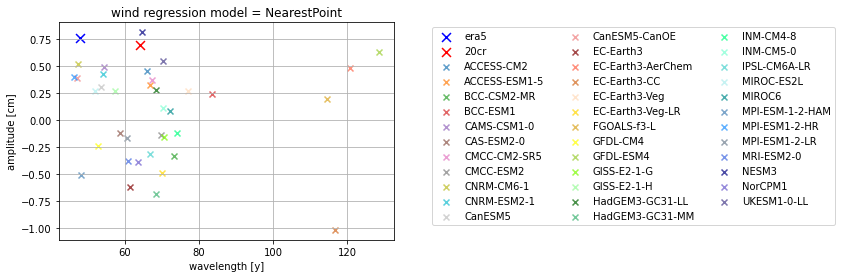

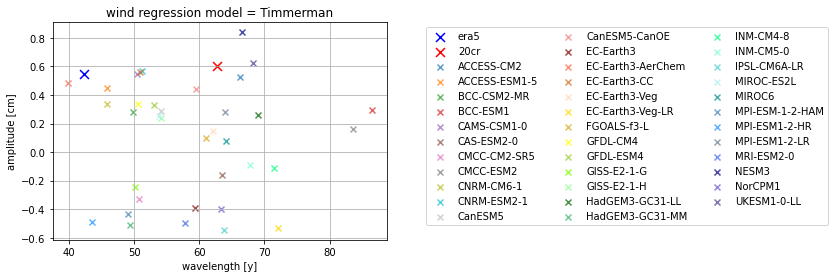

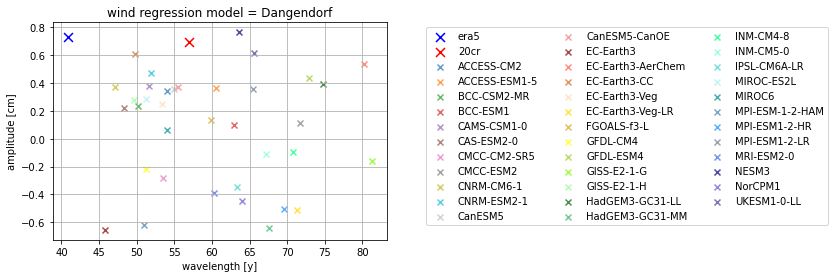

In [35]:
figs.plot_comp_cmip6_fit_results(obs_fits_df_60, cmip6_fits_df_60)

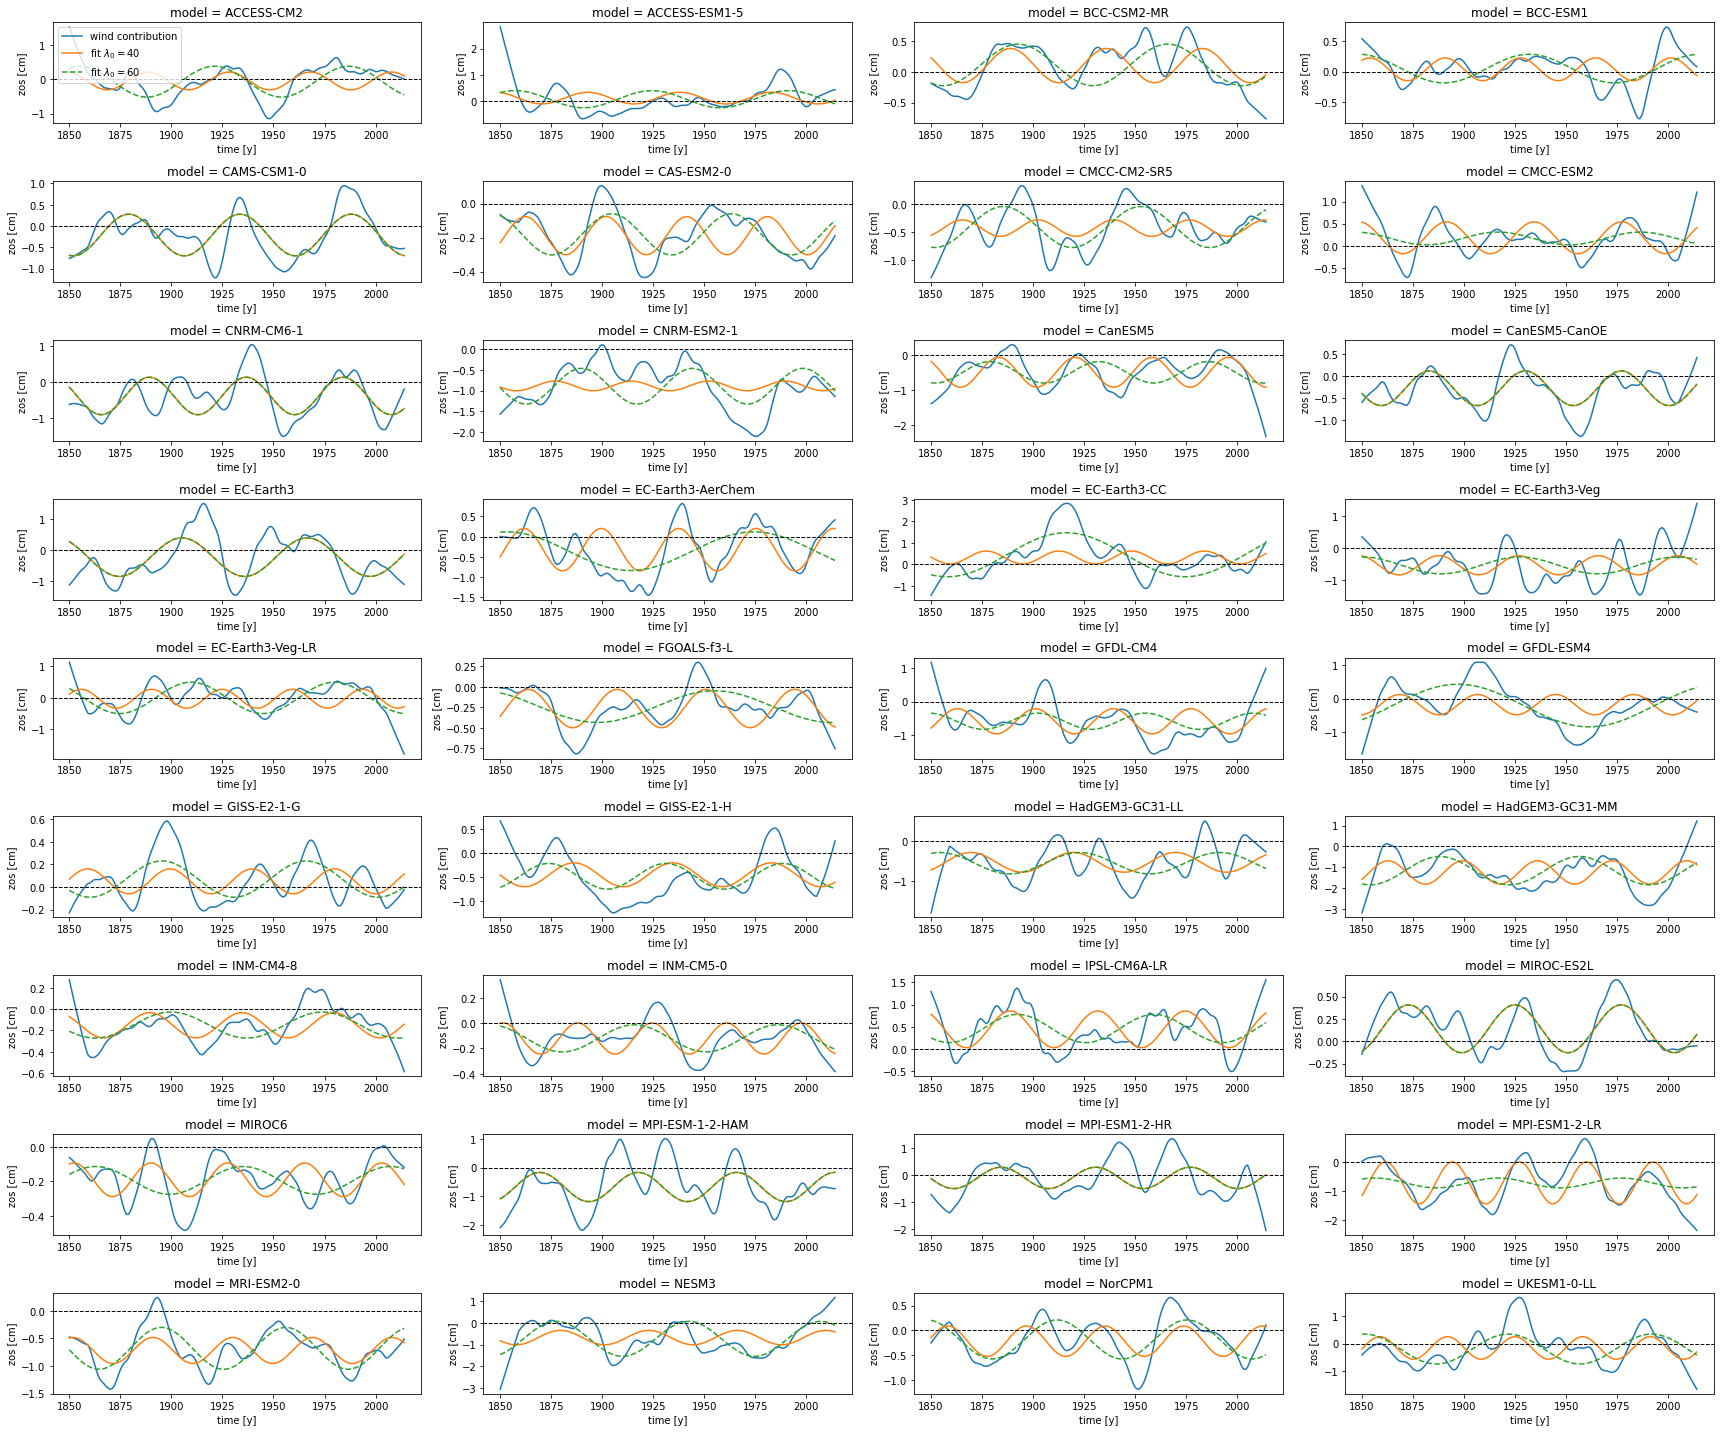

In [36]:
# Plot the cmip6 timeseries for wind model 'NearestPoint' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_np_hist.sel(station='Average'), cmip6_fits_df_40['NearestPoint'], cmip6_fits_df_60['NearestPoint'])

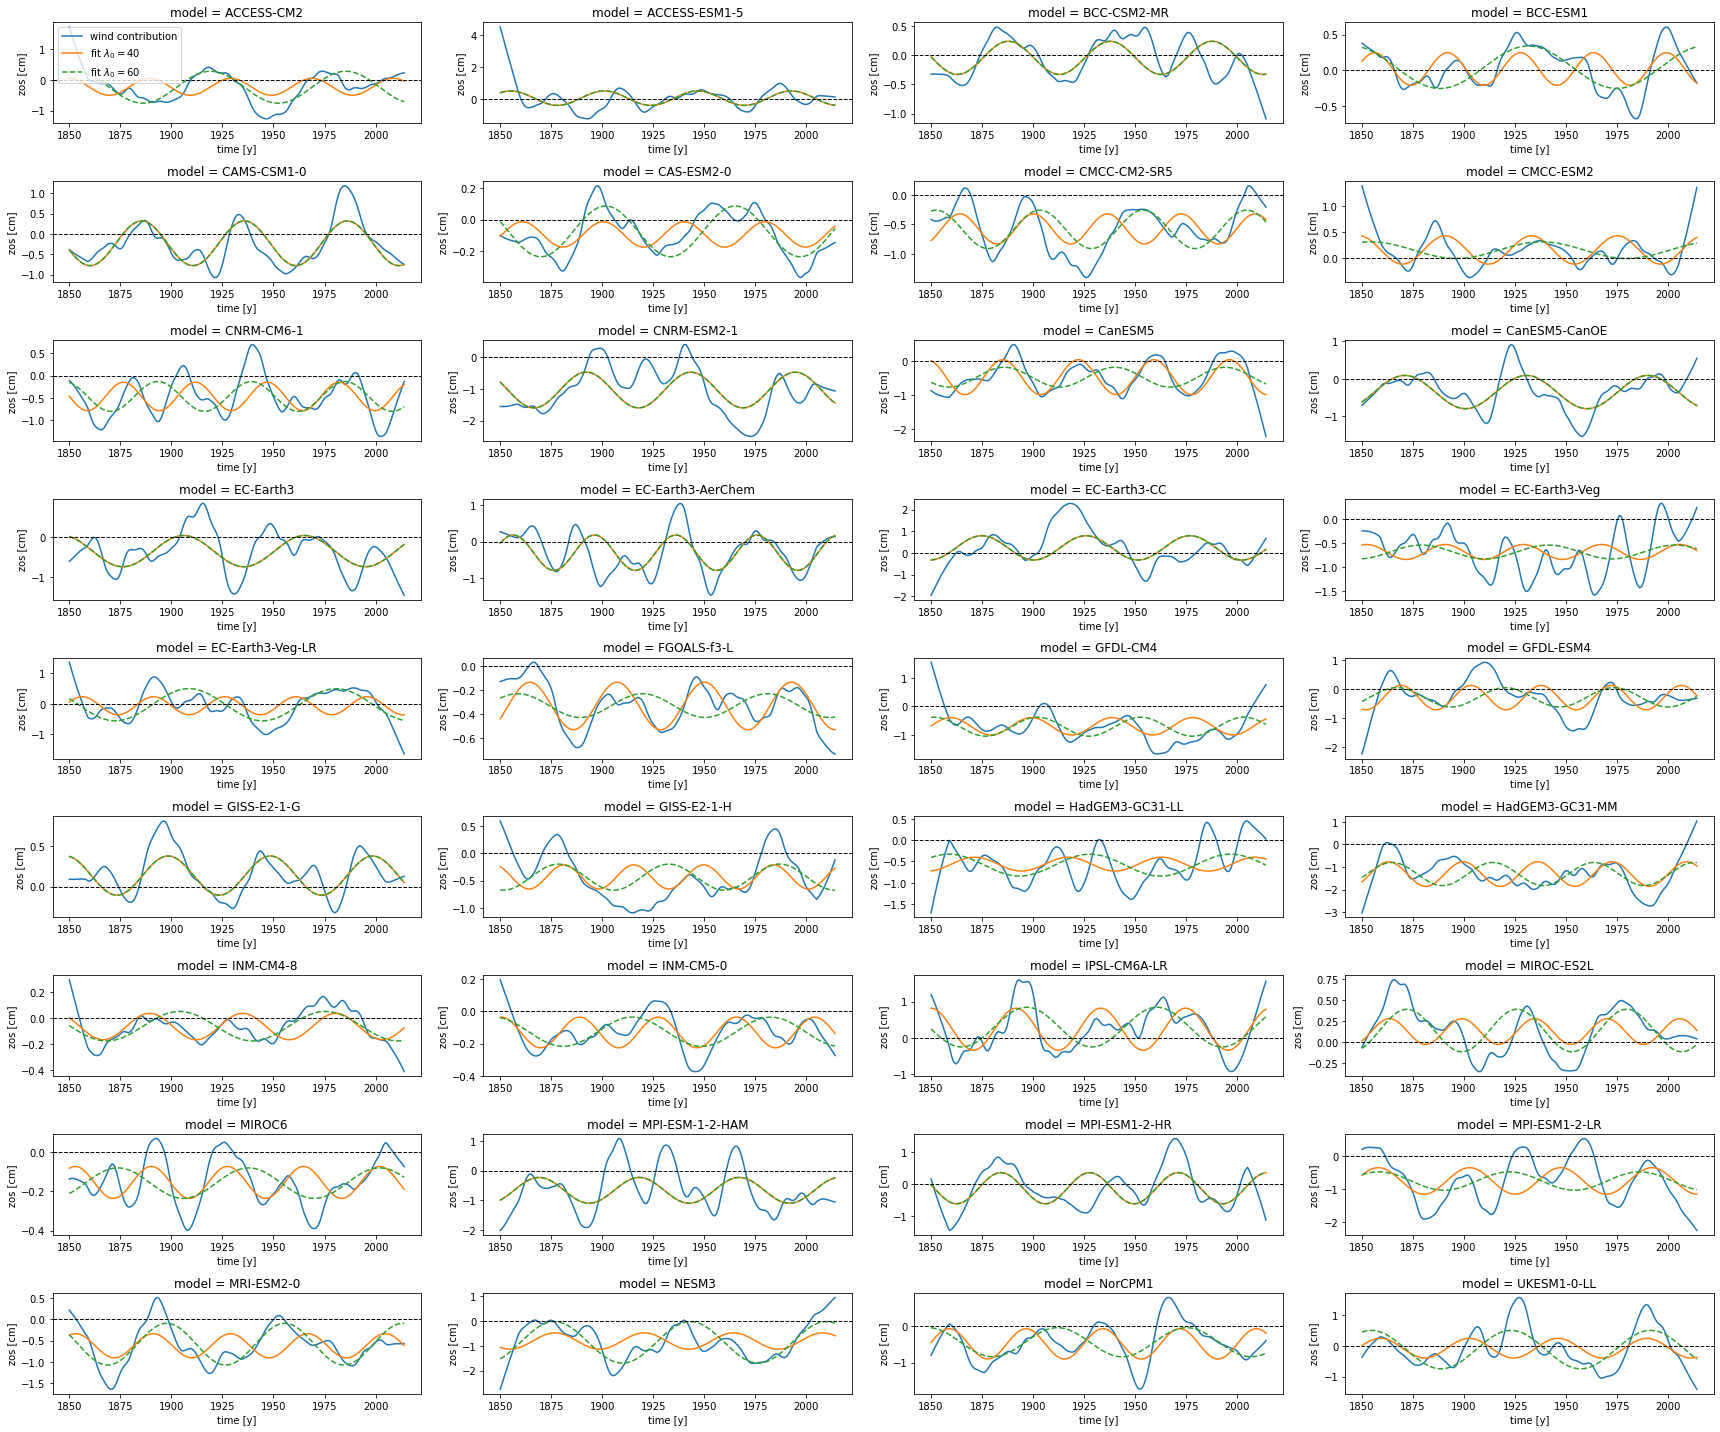

In [37]:
# Plot the cmip6 timeseries for wind model 'Timmerman' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_tim_hist.sel(station='Average'), cmip6_fits_df_40['Timmerman'], cmip6_fits_df_60['Timmerman'])

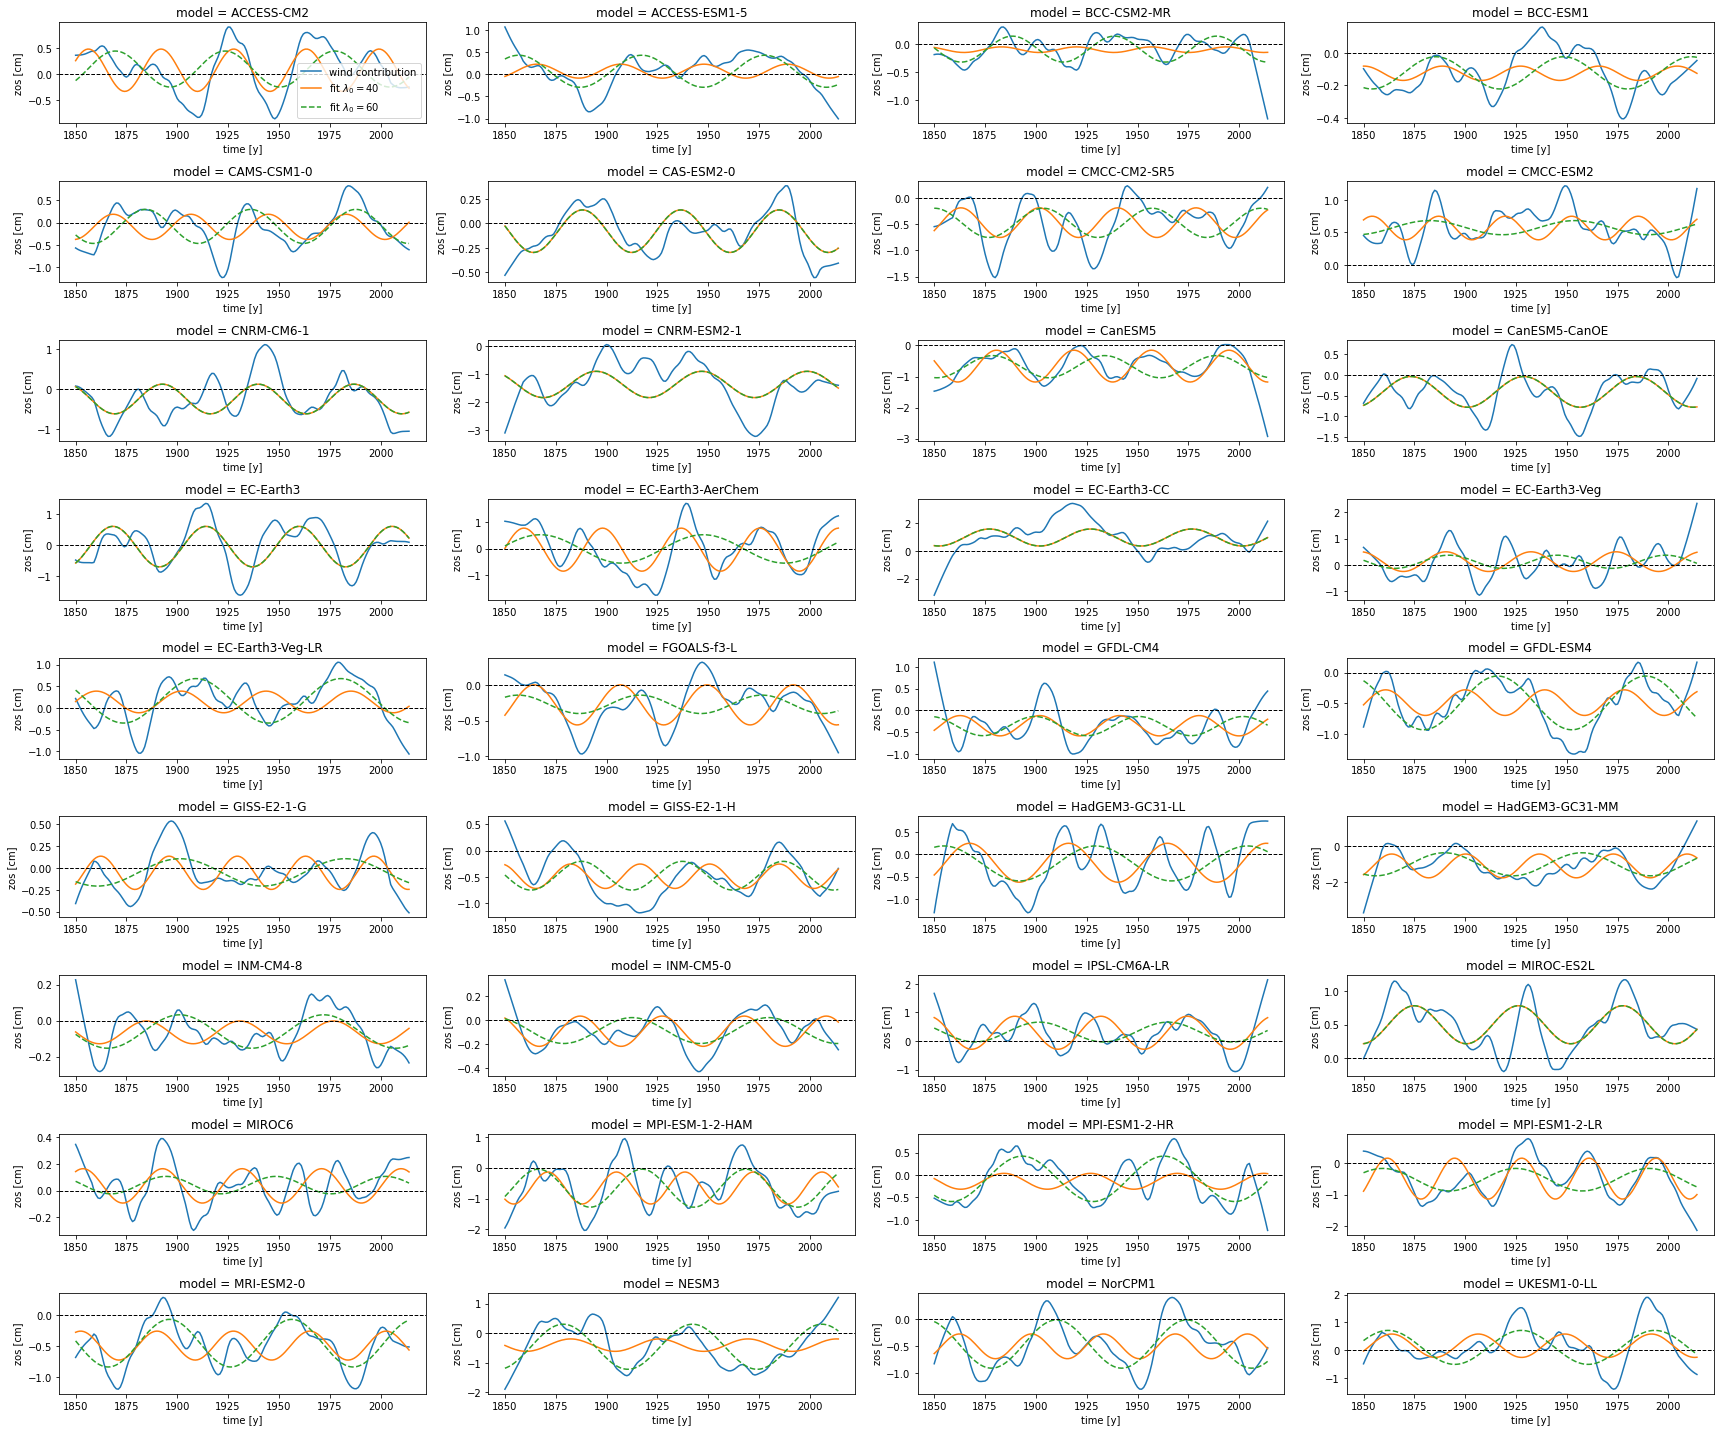

In [38]:
# Plot the cmip6 timeseries for wind model 'Dangendorf' and the different fit results

figs.plot_cmip6_fits_per_model(ts_lws_dang_hist.sel(station='Average'), cmip6_fits_df_40['Dangendorf'], cmip6_fits_df_60['Dangendorf'])

#### As fitting a sine doesn't give a clear choice for wavelength I will now perform a fourier transform


The positive frequency terms are contained in y[1], ..., y[N/2 - 1]. Typically, only the FFT corresponding to positive frequencies is plotted.

In [39]:
from scipy.fft import fft, ifft, fftfreq

In [40]:
data_lst = [ts_dt_lws_np_era5, ts_dt_lws_tim_era5, ts_dt_lws_dang_era5,
           ts_dt_lws_np_20cr, ts_dt_lws_tim_20cr, ts_dt_lws_dang_20cr]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

In [41]:
ts_dt_lws_tim_20cr

Vlissingen  Hoek v. Holland  Den Helder  Delfzijl  Harlingen  IJmuiden  \
time                                                                           
1836   -0.091709        -0.314582   -0.445171 -0.663985  -0.946603 -0.286289   
1837   -0.115676        -0.354100   -0.463865 -0.653473  -0.906817 -0.306053   
1838   -0.136879        -0.388792   -0.478068 -0.638767  -0.861703 -0.321866   
1839   -0.156522        -0.420604   -0.489947 -0.622357  -0.814130 -0.335472   
1840   -0.174367        -0.449415   -0.499394 -0.604087  -0.764597 -0.346672   
...          ...              ...         ...       ...        ...       ...   
2011   -0.203839         0.020473   -0.036268 -0.167903   0.104508 -0.000029   
2012   -0.279149         0.019484   -0.067042 -0.222994   0.143794 -0.047620   
2013   -0.355494         0.018465   -0.099113 -0.282805   0.179214 -0.094846   
2014   -0.433983         0.016567   -0.133556 -0.348365   0.210788 -0.142196   
2015   -0.513669         0.015572   -0.168420 -0.417178   0.241957 -0.187863   

       Average  
time            
1836 -0.433159  
1837 -0.451891  
1838 -0.466031  
1839 -0.477676  
1840 -0.486722  
...        ...  
2011  0.019255  
2012 -0.003992  
2013 -0.027794  
2014 -0.052976  
2015 -0.077561  

[180 rows x 7 columns]

In [42]:
N = ts_dt_lws_np_era5['Average'].size # Number of sample points
T = 1 # Sample spacing, 1 year

fourier_fit = fft(ts_dt_lws_np_era5['Average'].values)
inverse_fourier_fit = ifft(ts_dt_lws_np_era5['Average'].values)
four_freq = fftfreq(N, T)[:N//2]
plt.figure(figsize=(9,2))
plt.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
#plt.xlim(0,80)
plt.grid()
plt.xlabel('Wavelength [y]')
plt.ylabel('Power')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
N = timeseries_np_era5['Average', 'wind total'].size # Number of sample points
T = 1 # Sample spacing, 1 year

fourier_fit = fft(timeseries_np_era5['Average', 'wind total'].values)
inverse_fourier_fit = ifft(timeseries_np_era5['Average', 'wind total'].values)
four_freq = fftfreq(N, T)[:N//2]
plt.figure(figsize=(9,2))
plt.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
#plt.xlim(0,80)
plt.grid()
plt.xlabel('Wavelength [y]')
plt.ylabel('Power')
plt.show()

In [ ]:
def obs_fourier_plot(data_lst, label_lst):
    """
    Function to make a plot of the trends over the whole timeseries of both 
    tide gauge observations and regression results per station averaged over all models
    
    For var choose a list consisting of ['u$^2$', 'v$^2$', 'trend', 'total', 'wind total']
    
    """
    T = 1 # Sample spacing, 1 year
    
    
    
    fig, axs = plt.subplots(3, 2, figsize=(12, 7))
    
    for i in range(3):
        
        
        ax = axs[i,0]
        
        data = data_lst[2*i]
        N = data.size # Number of sample points
        fourier_fit = fft(data.values)
        four_freq = fftfreq(N, T)[:N//2]
        
        ax.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
        ax.grid()
        if i == 2:
            ax.set_xlabel('Wavelength [y]')
        ax.set_ylabel('Power')
        ax.set_title(label_lst[2*i])
        plt.tight_layout()
        
        ax = axs[i,1]
        
        data = data_lst[2*i+1]
        N = data.size # Number of sample points
        fourier_fit = fft(data.values)
        four_freq = fftfreq(N, T)[:N//2]
        
        ax.scatter(np.pi/four_freq, 2.0/N * np.abs(fourier_fit[0:N//2]), marker = 'x', s=20)
        ax.grid()
        if i == 2:
            ax.set_xlabel('Wavelength [y]')
        ax.set_title(label_lst[2*i+1])
        plt.tight_layout()

In [ ]:
data_lst = [timeseries_np_era5['Average', 'wind total'], timeseries_tim_era5['Average', 'wind total'], 
            timeseries_dang_era5['Average', 'wind total'],timeseries_np_20cr['Average', 'wind total'], 
            timeseries_tim_20cr['Average', 'wind total'], timeseries_dang_20cr['Average', 'wind total']]
label_lst = ['np_era5', 'tim_era5', 'dang_era5', 'np_20cr', 'tim_20cr', 'dang_20cr']

obs_fourier_plot(data_lst, label_lst)

#### Spectral analysis

Aim: compare variance of observations and models

In [43]:
def detrend_dim(da, dim, deg=1): 
    """
    Function that detrends the data from a dataarray along a single dimension
    deg=1 for linear fit
    
    """
    
    p = da.polyfit(dim=dim, deg=deg)
    coord = da[dim] - da[dim].values[0]
    trend = coord*p.polyfit_coefficients.sel(degree=1)
    return da - trend

In [83]:
import pandas as pd
from scipy.signal import periodogram
from scipy.signal import detrend
from sklearn.metrics import auc

# Create detrended dataframe of observed data containing wind contribution to sea level for the average station
i_start = next(i for i,v in enumerate(timeseries_np_era5.index.values) if v>=1950)
i_end = next(i for i,v in enumerate(timeseries_np_era5.index.values) if v>=2015)
timeseries_obs_era5 = pd.DataFrame({'time':timeseries_np_era5[i_start:i_end+1].index.values, 'NearestPoint':detrend(timeseries_np_era5[i_start:i_end+1]['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_era5[i_start:i_end+1]['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_era5[i_start:i_end+1]['Average', 'wind total'])})

i_start = next(i for i,v in enumerate(timeseries_np_20cr.index.values) if v>=1950)
i_end = next(i for i,v in enumerate(timeseries_np_20cr.index.values) if v>=2015)
timeseries_obs_20cr = pd.DataFrame({'time':timeseries_np_20cr[i_start:i_end+1].index.values, 'NearestPoint':detrend(timeseries_np_20cr[i_start:i_end+1]['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_20cr[i_start:i_end+1]['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_20cr[i_start:i_end+1]['Average', 'wind total'])})



timeseries_obs_era5 = timeseries_obs_era5.set_index('time')
timeseries_obs_20cr = timeseries_obs_20cr.set_index('time')



# Detrend  cmip6 data


In [81]:
import pandas as pd
from scipy.signal import periodogram
from scipy.signal import detrend
from sklearn.metrics import auc

# Create detrended dataframe of observed data containing wind contribution to sea level for the average station
timeseries_obs_era5 = pd.DataFrame({'time':timeseries_np_era5.index.values, 'NearestPoint':detrend(timeseries_np_era5['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_era5['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_era5['Average', 'wind total'])})

timeseries_obs_20cr = pd.DataFrame({'time':timeseries_np_20cr.index.values, 'NearestPoint':detrend(timeseries_np_20cr['Average', 'wind total']),
                                   'Timmerman':detrend(timeseries_tim_20cr['Average', 'wind total']), 'Dangendorf':detrend(timeseries_dang_20cr['Average', 'wind total'])})



timeseries_obs_era5 = timeseries_obs_era5.set_index('time')
timeseries_obs_20cr = timeseries_obs_20cr.set_index('time')



# Detrend  cmip6 data


I am interested in wavelengths between 30 and 60 years corresponding to approx frequencies between 0.1 and 0.2.
The aim is to plot the periodogram and calculate the total variance and the variance between frequency 0.1 and 0.2

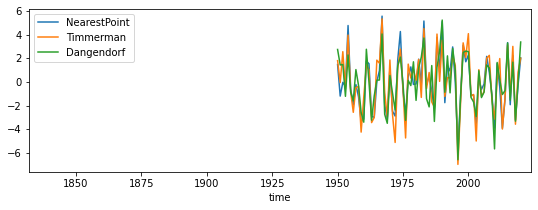

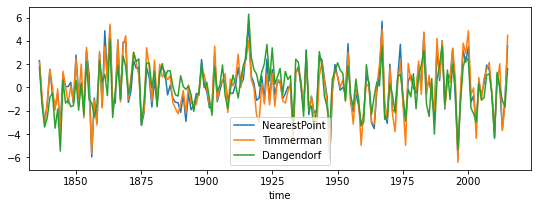

In [46]:
timeseries_obs_era5.plot(figsize = (9,3), xlim=(1832,2024))
timeseries_obs_20cr.plot(figsize = (9,3), xlim=(1832,2024))

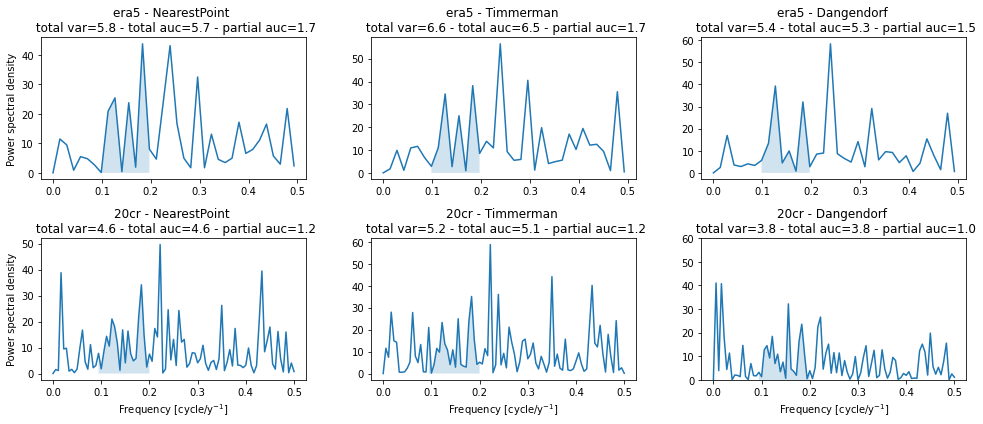

In [56]:
import matplotlib.pyplot as plt
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

n_cols = 3
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        
        f, Pxx = periodogram(data[i][labels_windmodel[j]])
        var = round(data[i][labels_windmodel[j]].var(),1)
        total_auc = round(auc(f, Pxx),1)
        
        i_start = next(i for i,v in enumerate(f) if v>=0.09)
        i_end = next(i for i,v in enumerate(f) if v>0.2)
        
        partial_auc = round(auc(f[i_start:i_end], Pxx[i_start:i_end]),1)

        
        
            
        ax.plot(f, Pxx)
        ax.fill_between(f[i_start:i_end], Pxx[i_start:i_end], alpha = 0.2)
        
        
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc}')
        if i == n_rows-1:
            ax.set_xlabel('Frequency [cycle/y$^{-1}$]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels_windmodel[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            
ax.set_ylim(0,60)    
plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_periodograms_1950_2015')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])       

In [57]:
df_spec_obs

era5                              20cr            \
               NearestPoint Timmerman Dangendorf NearestPoint Timmerman   
variable                                                                  
total variance          5.8       6.6        5.4          4.6       5.2   
total auc               5.7       6.5        5.3          4.6       5.1   
partial auc             1.7       1.7        1.5          1.2       1.2   

                           
               Dangendorf  
variable                   
total variance        3.8  
total auc             3.8  
partial auc           1.0

In [58]:
import xarray as xr

labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
timeseries = [timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist]

var_lst = []
tot_auc_lst1 = []
part_auc_lst1 = []
for i,v in enumerate(labels_windmodel):
    detrended = detrend_dim(timeseries[i]['wind_total'].sel(station='Average', drop=True), 'time')
    var_lst.append(detrended.var(dim='time'))
    
    tot_auc_lst, part_auc_lst = [], []
    for model in detrended.model:
        data = detrended.sel(model = model)
        f, Pxx = periodogram(data.values)
        tot_auc_lst.append(round(auc(f, Pxx),1))
        
        i_start = next(i for i,v in enumerate(f) if v>=0.09)
        i_end = next(i for i,v in enumerate(f) if v>0.2)
        
        part_auc_lst.append(round(auc(f[i_start:i_end], Pxx[i_start:i_end]),1))
    
    tot_auc_lst1.append(xr.Dataset(data_vars = dict(total_auc = (['model'], tot_auc_lst)),
                                   coords = dict(model=detrended.model.values)))
    part_auc_lst1.append(xr.Dataset(data_vars = dict(partial_auc = (['model'], part_auc_lst)),
                                    coords = dict(model=detrended.model.values)))

variance_cmip6 = xr.concat(var_lst, labels_windmodel).rename({"concat_dim":"wind_model"})
tot_auc_cmip6 = xr.concat(tot_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).total_auc
part_auc_cmip6 = xr.concat(part_auc_lst1, labels_windmodel).rename({"concat_dim":"wind_model"}).partial_auc

<ipython-input-59-581ce304c7b0>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


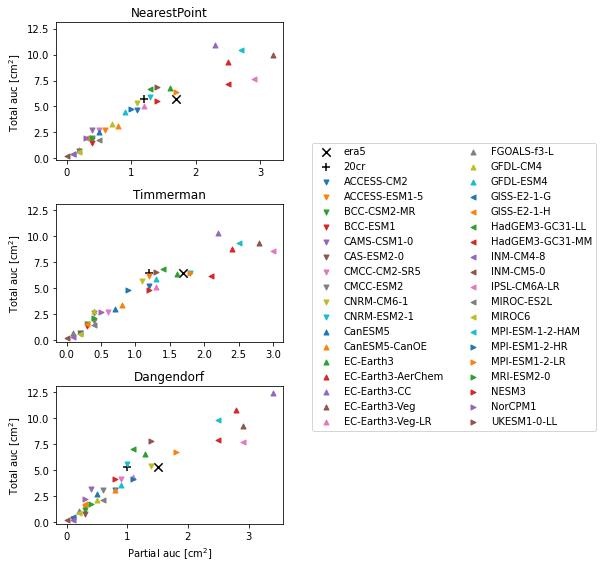

In [59]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
markers = ['v', '^', '<', '>']

n_cols = 1
n_rows = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4, 8) )

dfs = []
for i in range(n_rows):
    
    ax = axs[i]
    ax.scatter(df_spec_obs['era5', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = 'x', s=70, c='k')
    ax.scatter(df_spec_obs['20cr', labels_windmodel[i]]['partial auc'], df_spec_obs['era5', labels_windmodel[i]]['total auc'],
              marker = '+', s=80, c='k')
    for j, model in enumerate(tot_auc_cmip6.model):
        ax.scatter(part_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  tot_auc_cmip6.sel(model=model, wind_model = labels_windmodel[i]),
                  marker = markers[int((3.6*j)/36)], s=25)
    
    
    ax.set_ylim(-0.2,13.1)
    ax.set_ylabel('Total auc [cm$^2$]')
    ax.set_title(labels_windmodel[i])
    if i == n_rows-1:
        ax.set_xlabel('Partial auc [cm$^2$]')
    plt.tight_layout()
    
labels = labels_data + list(tot_auc_cmip6.model.values)
plt.legend(labels = labels,ncol=2, bbox_to_anchor=(2.4, 2.8))
plt.tight_layout()


plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/tot_part_auc')



#### Spectral analysis using mtspec

In [60]:
from mtspec.multitaper import mtspec

In [73]:
spec, freq, conf_int, f_stat, n_freedom = mtspec(timeseries_obs_era5['NearestPoint'], 1.0, 2, statistics = True)

In [62]:
import matplotlib.pyplot as plt

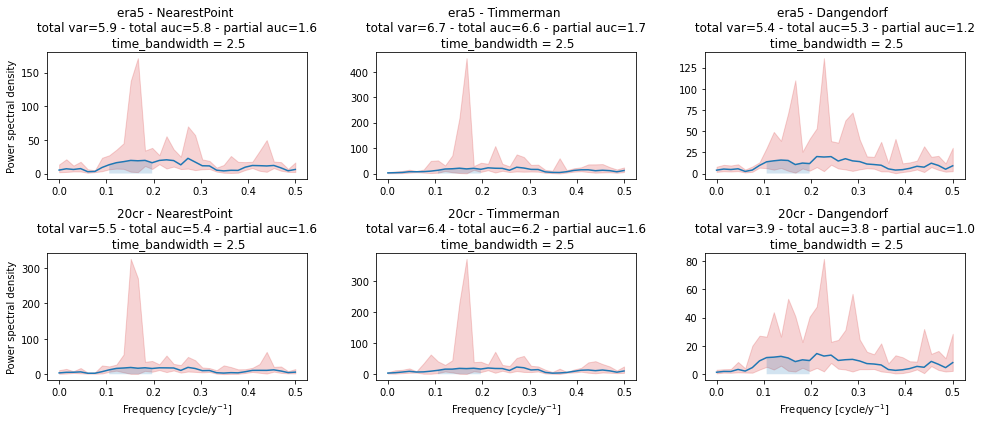

In [112]:
labels_windmodel = ['NearestPoint', 'Timmerman', 'Dangendorf']
labels_data = ['era5', '20cr']
data = [timeseries_obs_era5, timeseries_obs_20cr]

n_cols = 3
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 6))

dfs = []
for i in range(n_rows):
    
    for j in range(n_cols):
        
        ax = axs[i,j]
        time_bandwidth = 2.5
        spec, freq, conf_int, f_stat, n_freedom = mtspec(data[i][labels_windmodel[j]], 1.0, time_bandwidth, statistics = True)
        var = round(data[i][labels_windmodel[j]].var(),1)
        total_auc = round(auc(freq, spec),1)
        
        i_start = next(i for i,v in enumerate(freq) if v>=0.1)
        i_end = next(i for i,v in enumerate(freq) if v>0.2)
        
        partial_auc = round(auc(freq[i_start:i_end], spec[i_start:i_end]),1)

        
        
            
        ax.plot(freq, spec)
        ax.fill_between(freq, conf_int[:, 0], conf_int[:, 1], color="tab:red", alpha=0.2)
        ax.fill_between(freq[i_start:i_end], spec[i_start:i_end], alpha = 0.2)
        
        
        ax.set_title(f'{labels_data[i]} - {labels_windmodel[j]} \n total var={var} - total auc={total_auc} - partial auc={partial_auc} '+
                     f'\n time_bandwidth = {time_bandwidth}')
        if i == n_rows-1:
            ax.set_xlabel('Frequency [cycle/y$^{-1}$]')
            
            
        if j == 0:
            df = pd.DataFrame({'variable':['total variance', 'total auc', 'partial auc']})
            df = df.set_index('variable')
            ax.set_ylabel('Power spectral density')
        df[labels[j]] = [var, total_auc, partial_auc]
        
        
     
    dfs.append(df)       
    
            
    
plt.tight_layout()
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/obs_spec_mtspec_1950_tb25')
        
df_spec_obs = pd.concat(dfs, axis=1, keys = ['era5', '20cr'])       

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])